In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

In [2]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        
    def _to_X(self, points_x):
        return (np.array(points_x) ** np.arange(self.max_degree + 1)[:, np.newaxis]).T
        
    def fit(self, points_x, points_y):
        X = self._to_X(points_x)
        self.weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, points_y))
        return self
    
    def predict(self, points_x):
        return np.dot(self._to_X(points_x), self.weights)

In [3]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

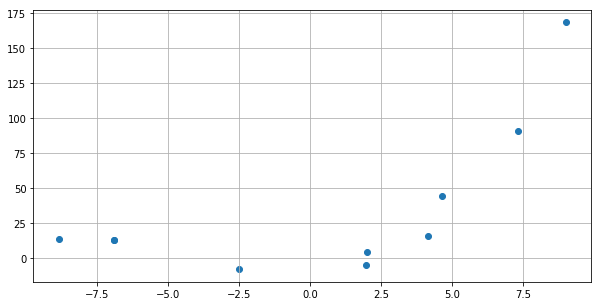

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [5]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.grid()
    plt.show()

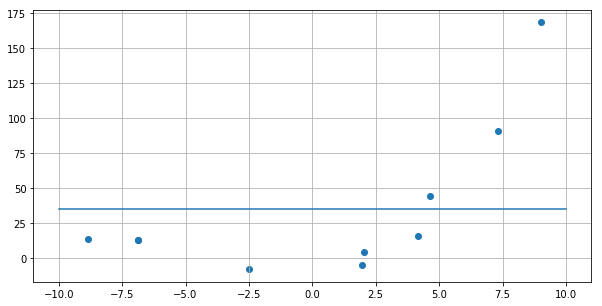

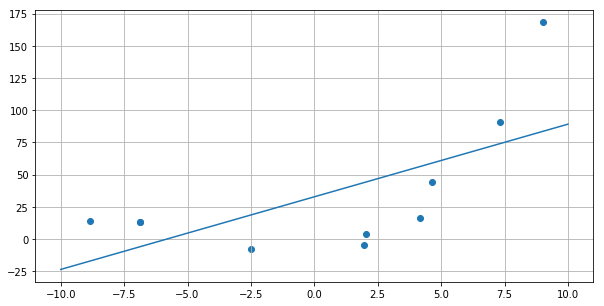

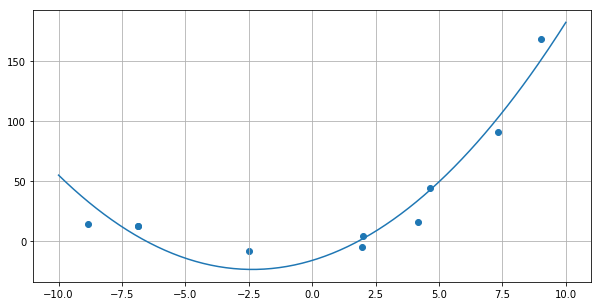

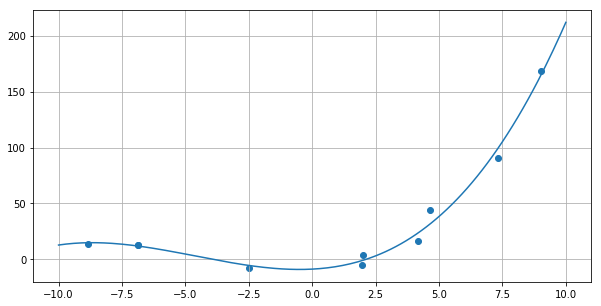

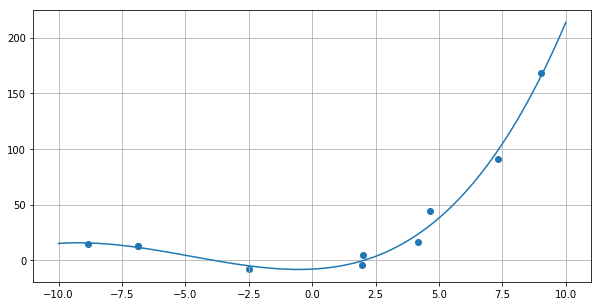

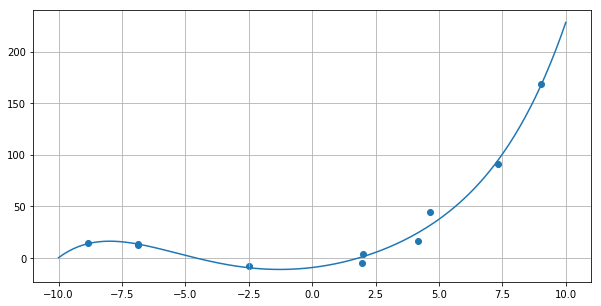

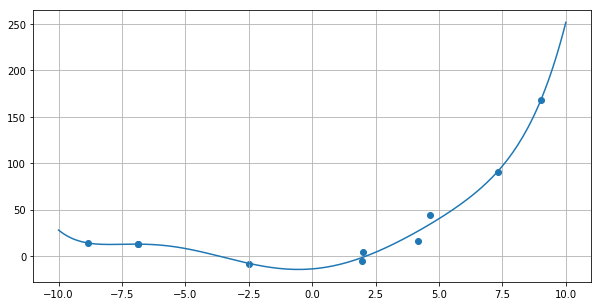

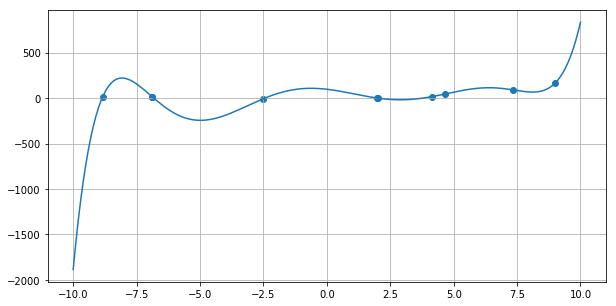

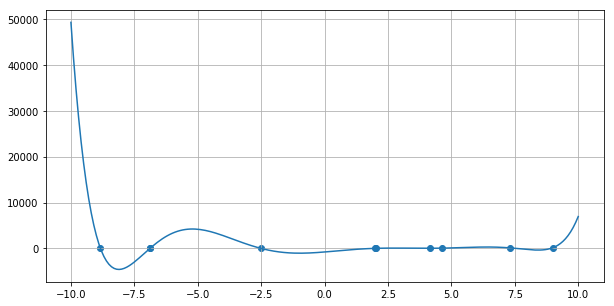

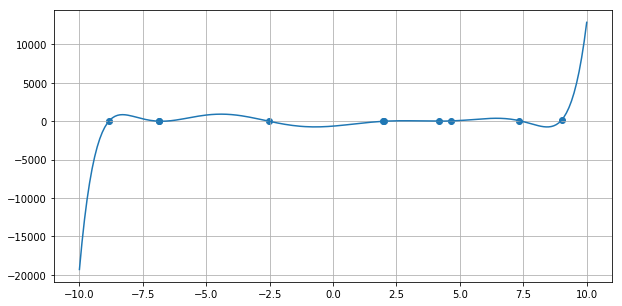

In [6]:
for i in range(10):
    plot_model(i)